In [1]:
import pandas as pd

df = pd.read_csv("campaign_data.csv")
df.head()


,customer_id,article_id,price,is_campaign,customer_age,index_group_name,department_name,perceived_colour_value_name,t_dat
0,00459f7666dd1cc5bdc650f6fd19c3ddef181725dd2eb3...,811925001,0.03,f,25.0,Ladieswear,Swimwear,Light,2020-06-01
1,0c9998c71217a701bfd528c78deadbbc9d1cbcb5f3f93c...,505882006,0.03,f,23.0,Ladieswear,Casual Lingerie,Dusty Light,2020-06-01
2,0c9998c71217a701bfd528c78deadbbc9d1cbcb5f3f93c...,901758001,0.03,f,23.0,Divided,Skirts,Dusty Light,2020-06-01
3,0c9998c71217a701bfd528c78deadbbc9d1cbcb5f3f93c...,723469002,0.02,t,23.0,Ladieswear,Casual Lingerie,Dusty Light,2020-06-01
4,0c9998c71217a701bfd528c78deadbbc9d1cbcb5f3f93c...,839194006,0.02,f,23.0,Divided,Tops Fancy Jersey,Dusty Light,2020-06-01


In [2]:
import pandas as pd

df = pd.read_csv("campaign_data.csv")
df.head()


,customer_id,article_id,price,is_campaign,customer_age,index_group_name,department_name,perceived_colour_value_name,t_dat
0,00459f7666dd1cc5bdc650f6fd19c3ddef181725dd2eb3...,811925001,0.03,f,25.0,Ladieswear,Swimwear,Light,2020-06-01
1,0c9998c71217a701bfd528c78deadbbc9d1cbcb5f3f93c...,505882006,0.03,f,23.0,Ladieswear,Casual Lingerie,Dusty Light,2020-06-01
2,0c9998c71217a701bfd528c78deadbbc9d1cbcb5f3f93c...,901758001,0.03,f,23.0,Divided,Skirts,Dusty Light,2020-06-01
3,0c9998c71217a701bfd528c78deadbbc9d1cbcb5f3f93c...,723469002,0.02,t,23.0,Ladieswear,Casual Lingerie,Dusty Light,2020-06-01
4,0c9998c71217a701bfd528c78deadbbc9d1cbcb5f3f93c...,839194006,0.02,f,23.0,Divided,Tops Fancy Jersey,Dusty Light,2020-06-01


In [3]:
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())

(4353201, 9)
customer_id                     object
article_id                       int64
price                          float64
is_campaign                     object
customer_age                   float64
index_group_name                object
department_name                 object
perceived_colour_value_name     object
t_dat                           object
dtype: object
customer_id                        0
article_id                         0
price                              0
is_campaign                        0
customer_age                   16873
index_group_name                   0
department_name                    0
perceived_colour_value_name        0
t_dat                              0
dtype: int64


In [5]:
df['customer_age'] = df['customer_age'].astype(str).str.replace(r'\s+', '', regex=True).replace('nan', '')






In [6]:
print(df.isnull().sum())

customer_id                    0
article_id                     0
price                          0
is_campaign                    0
customer_age                   0
index_group_name               0
department_name                0
perceived_colour_value_name    0
t_dat                          0
dtype: int64


In [7]:
import numpy as np

df['customer_age'] = pd.to_numeric(df['customer_age'], errors='coerce')  
print(df.loc[df['customer_age'].isna(), 'customer_age']) 

df = df.dropna(subset=['customer_age'])  
df['customer_age'] = df['customer_age'].astype(int) 



1223      NaN
1907      NaN
1908      NaN
2863      NaN
2896      NaN
           ..
4352370   NaN
4352371   NaN
4352372   NaN
4352373   NaN
4352374   NaN
Name: customer_age, Length: 16873, dtype: float64


/var/folders/zc/sw__qt8j08505cqc2hdykldh0000gn/T/ipykernel_52998/2225906545.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_age'] = df['customer_age'].astype(int)


/var/folders/zc/sw__qt8j08505cqc2hdykldh0000gn/T/ipykernel_52998/4123351991.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_campaign_num'] = df['is_campaign'].map({'f': 0, 't': 1})
/var/folders/zc/sw__qt8j08505cqc2hdykldh0000gn/T/ipykernel_52998/4123351991.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_age'] = df['customer_age'].astype(float)


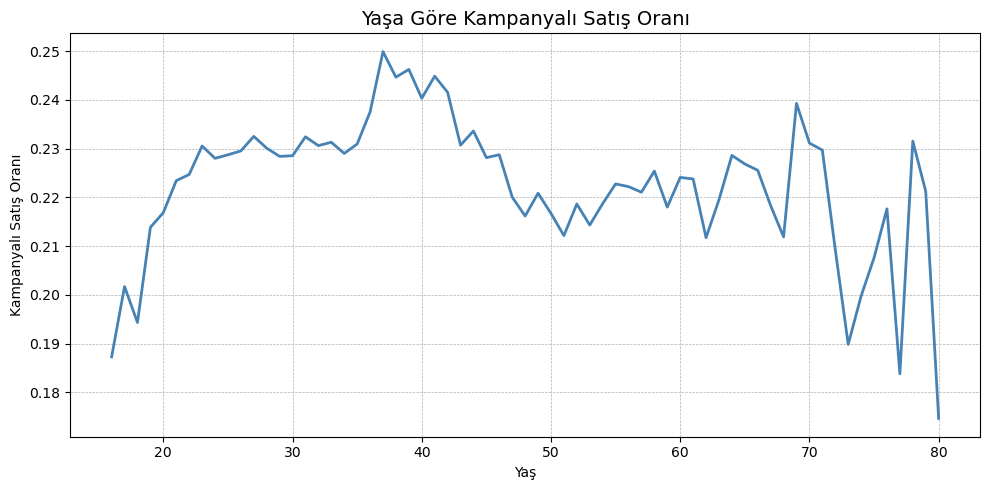

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df['is_campaign_num'] = df['is_campaign'].map({'f': 0, 't': 1})


df['customer_age'] = df['customer_age'].astype(float)
df = df[(df['customer_age'] >= 10) & (df['customer_age'] <= 80)]


age_campaign_ratio = df.groupby('customer_age')['is_campaign_num'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=age_campaign_ratio, x='customer_age', y='is_campaign_num', color='steelblue', linewidth=2)
plt.title("Yaşa Göre Kampanyalı Satış Oranı", fontsize=14)
plt.xlabel("Yaş")
plt.ylabel("Kampanyalı Satış Oranı")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [9]:
print(df['is_campaign'].unique())


['f' 't']


In [10]:
df['is_campaign_num'] = df['is_campaign'].map({'f': 0, 't': 1})
print(df['is_campaign_num'].isna().sum())


0


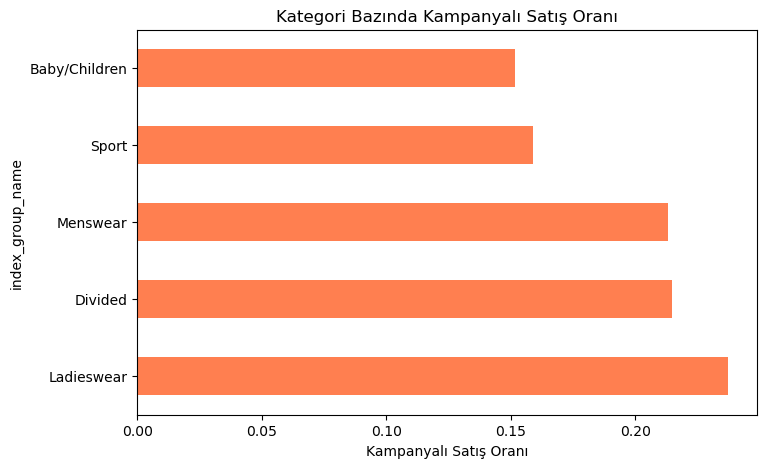

In [11]:

df['is_campaign_num'] = df['is_campaign'].map({'f':0, 't':1}).fillna(0).astype(int)


campaign_rate = df.groupby("index_group_name")["is_campaign_num"].mean().sort_values(ascending=False)


campaign_rate.plot(kind="barh", figsize=(8,5), color="coral")
plt.title("Kategori Bazında Kampanyalı Satış Oranı")
plt.xlabel("Kampanyalı Satış Oranı")
plt.show()



In [12]:
df['t_dat'] = pd.to_datetime(df['t_dat'])
df['week'] = df['t_dat'].dt.isocalendar().week


In [13]:
df['age_group'] = pd.cut(df['customer_age'], bins=[0, 18, 25, 35, 50, 100],
                         labels=['0-18', '19-25', '26-35', '36-50', '50+'])


In [17]:
df_sample = df.sample(n=10000, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['index_group_name', 'department_name', 'perceived_colour_value_name', 'age_group']
for col in cat_cols:
    df_sample[col] = df_sample[col].astype(str)
    le = LabelEncoder()
    df_sample[col + '_enc'] = le.fit_transform(df_sample[col])


/Users/sinan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:555: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)


In [24]:
df_sample = df.sample(n=100000, random_state=42)
df_sample['is_campaign'] = df_sample['is_campaign'].replace({'f': 0, 't': 1})

features = ['price', 'customer_age', 'week'] + [col + '_enc' for col in cat_cols]
X = df_sample[features]
y = df_sample['is_campaign'].astype(int)


In [20]:
df_sample.columns

Index(['customer_id', 'article_id', 'price', 'is_campaign', 'customer_age',
       'index_group_name', 'department_name', 'perceived_colour_value_name',
       't_dat', 'is_campaign_num', 'week', 'age_group', 'index_group_name_enc',
       'department_name_enc', 'perceived_colour_value_name_enc',
       'age_group_enc'],
      dtype='object')

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


from sklearn.metrics import classification_report, confusion_matrix
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14191  1317]
 [ 2146  2346]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     15508
           1       0.64      0.52      0.58      4492

    accuracy                           0.83     20000
   macro avg       0.75      0.72      0.73     20000
weighted avg       0.82      0.83      0.82     20000



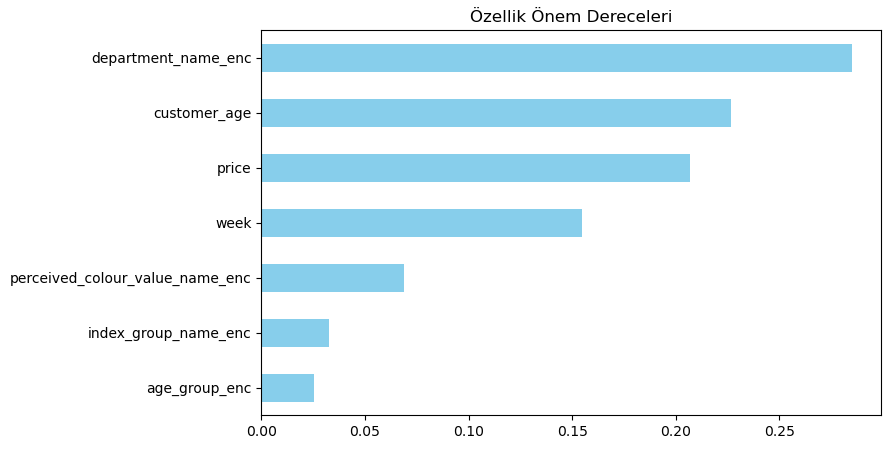

In [26]:
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,5), color='skyblue')
plt.title("Özellik Önem Dereceleri")
plt.show()


In [27]:
X_train.head()

,price,customer_age,week,index_group_name_enc,department_name_enc,perceived_colour_value_name_enc,age_group_enc
1125882,0.04,23.0,26,2,168,2,1
2795487,0.03,51.0,30,1,167,3,4
2853608,0.00,33.0,30,1,193,0,2
2357989,0.02,30.0,29,2,186,5,2
774812,0.00,23.0,25,3,180,3,1


In [28]:
df['week'].value_counts()

26    553251
25    485462
27    364128
23    319924
32    308536
31    304682
30    294693
28    291633
35    285211
24    284694
29    284688
33    276318
34    243550
36     37985
Name: week, dtype: Int64

In [31]:
df_sample2 = df.sample(n=50000, random_state=42)
customer_features = df_sample2.groupby("customer_id").agg({
    "price": ["mean", "sum"],
    "is_campaign": "mean",
    "article_id": "count"
})
customer_features.columns = ["price_mean", "price_total", "campaign_rate", "n_transactions"]


In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_features)

kmeans = KMeans(n_clusters=5, random_state=42)
customer_features['cluster'] = kmeans.fit_predict(X_scaled)


In [33]:
df_sample2 = df_sample2.merge(customer_features[['cluster']], on='customer_id', how='left')


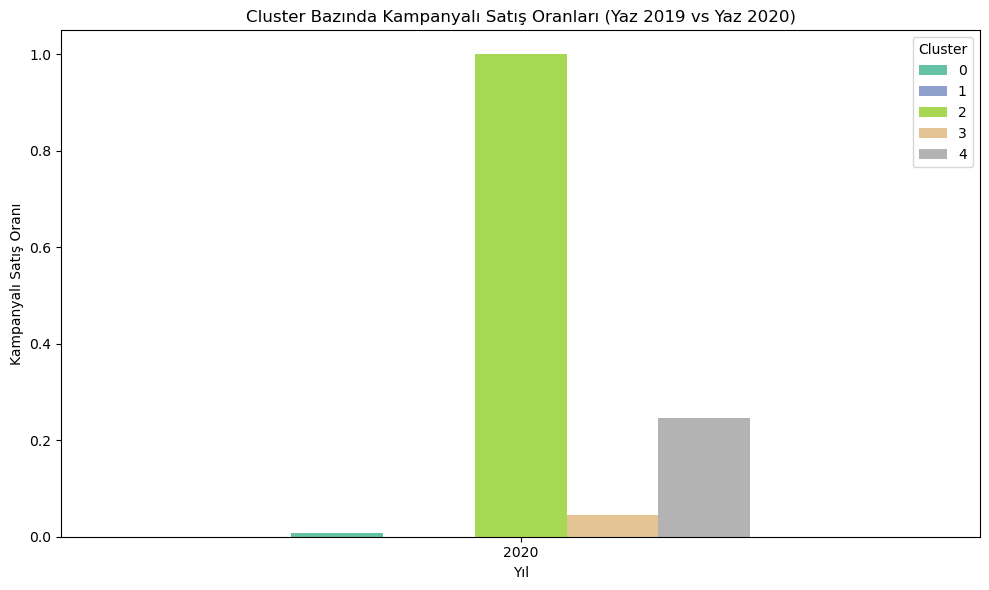

In [35]:
df_sample2['t_dat'] = pd.to_datetime(df_sample2['t_dat'])
df_sample2['year'] = df_sample2['t_dat'].dt.year
df_sample2['month'] = df_sample2['t_dat'].dt.month

summer_df = df_sample2[df_sample2['month'].isin([6, 7, 8]) & df_sample2['year'].isin([2019, 2020])]
grouped = summer_df.groupby(['year', 'cluster'])['is_campaign'].mean().unstack()

grouped.plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title("Cluster Bazında Kampanyalı Satış Oranları (Yaz 2019 vs Yaz 2020)")
plt.ylabel("Kampanyalı Satış Oranı")
plt.xlabel("Yıl")
plt.xticks(rotation=0)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()
